# Algae_concentration_evaluation_Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

## Importing Data set

In [2]:
df_raw= pd.read_csv('algae.csv',index_col='Unnamed: 0')

In [3]:
df=df_raw.copy()

In [4]:
df.head()

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
1,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
2,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
3,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
4,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
5,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0


## Data Processsing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  200 non-null    object 
 1   size    200 non-null    object 
 2   speed   200 non-null    object 
 3   mxPH    199 non-null    float64
 4   mnO2    198 non-null    float64
 5   Cl      190 non-null    float64
 6   NO3     198 non-null    float64
 7   NH4     198 non-null    float64
 8   oPO4    198 non-null    float64
 9   PO4     198 non-null    float64
 10  Chla    188 non-null    float64
 11  a1      200 non-null    float64
 12  a2      200 non-null    float64
 13  a3      200 non-null    float64
 14  a4      200 non-null    float64
 15  a5      200 non-null    float64
 16  a6      200 non-null    float64
 17  a7      200 non-null    float64
dtypes: float64(15), object(3)
memory usage: 29.7+ KB


In [6]:
df.isna().sum()

season     0
size       0
speed      0
mxPH       1
mnO2       2
Cl        10
NO3        2
NH4        2
oPO4       2
PO4        2
Chla      12
a1         0
a2         0
a3         0
a4         0
a5         0
a6         0
a7         0
dtype: int64

### Season

In [7]:
df['season'].unique()

array(['winter', 'spring', 'autumn', 'summer'], dtype=object)

In [8]:
season=pd.get_dummies(df['season'],drop_first=True)

In [9]:
df=pd.concat([df,season],axis=1)

In [10]:
df.head()

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,...,a1,a2,a3,a4,a5,a6,a7,spring,summer,winter
1,winter,small,medium,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,...,0.0,0.0,0.0,0.0,34.2,8.3,0.0,0,0,1
2,spring,small,medium,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,...,1.4,7.6,4.8,1.9,6.7,0.0,2.1,1,0,0
3,autumn,small,medium,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,...,3.3,53.6,1.9,0.0,0.0,0.0,9.7,0,0,0
4,spring,small,medium,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,...,3.1,41.0,18.9,0.0,1.4,0.0,1.4,1,0,0
5,autumn,small,medium,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,...,9.2,2.9,7.5,0.0,7.5,4.1,1.0,0,0,0


### size

In [11]:
df['size'].unique()

array(['small', 'medium', 'large'], dtype=object)

In [12]:
df['size']=df['size'].map({'small':1, 'medium':2, 'large':3})

### speed	

In [13]:
df['speed'].unique()

array(['medium', 'high', 'low'], dtype=object)

In [14]:
df['speed']=df['speed'].map({'low':1, 'medium':2, 'high':3})

In [15]:
df.drop('season',axis=1,inplace=True)
df.head()

,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7,spring,summer,winter
1,1,2,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0,0,0,1
2,1,2,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1,1,0,0
3,1,2,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7,0,0,0
4,1,2,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4,1,0,0
5,1,2,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0,0,0,0


In [16]:
df.isna().sum()

size       0
speed      0
mxPH       1
mnO2       2
Cl        10
NO3        2
NH4        2
oPO4       2
PO4        2
Chla      12
a1         0
a2         0
a3         0
a4         0
a5         0
a6         0
a7         0
spring     0
summer     0
winter     0
dtype: int64

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
'''
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['B']])
df['B'] = imputer.transform(df[['B']])
'''

"\nimputer = SimpleImputer(strategy='mean', missing_values=np.nan)\nimputer = imputer.fit(df[['B']])\ndf['B'] = imputer.transform(df[['B']])\n"

In [19]:
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
imputer = imputer.fit(df[['mxPH','mnO2','Cl','NO3','NH4','oPO4','PO4','Chla']])
df[['mxPH','mnO2','Cl','NO3','NH4','oPO4','PO4','Chla']] = imputer.transform(df[['mxPH','mnO2','Cl',
                                                                                 'NO3','NH4','oPO4','PO4','Chla']])

In [20]:
df.head()

,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7,spring,summer,winter
1,1,2,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0,0,0,1
2,1,2,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1,1,0,0
3,1,2,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7,0,0,0
4,1,2,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4,1,0,0
5,1,2,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0,0,0,0


In [21]:
df.isna().sum()

size      0
speed     0
mxPH      0
mnO2      0
Cl        0
NO3       0
NH4       0
oPO4      0
PO4       0
Chla      0
a1        0
a2        0
a3        0
a4        0
a5        0
a6        0
a7        0
spring    0
summer    0
winter    0
dtype: int64

## EDA

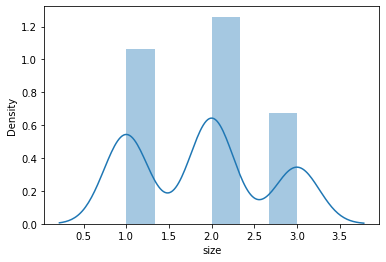

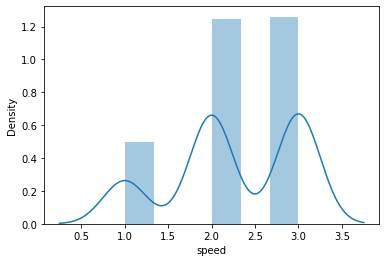

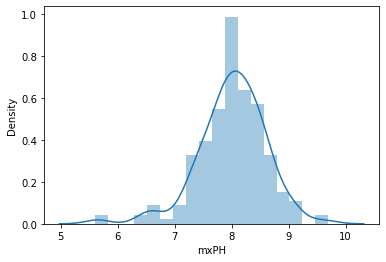

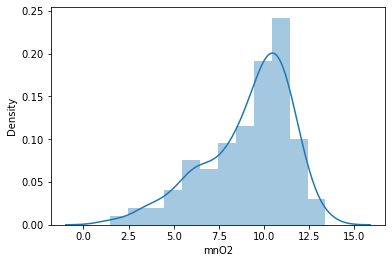

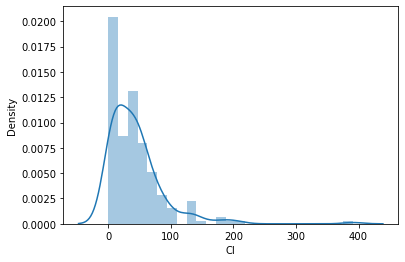

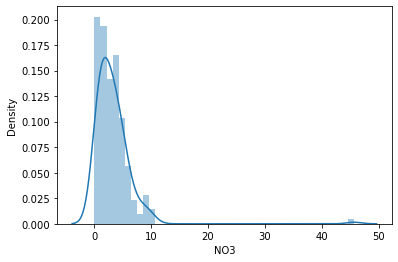

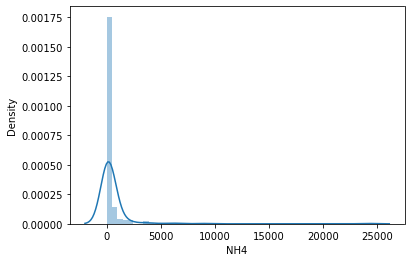

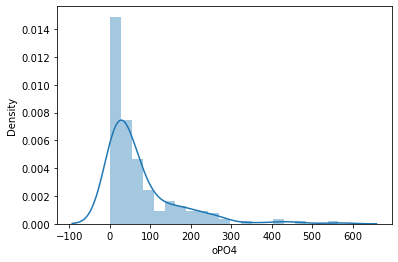

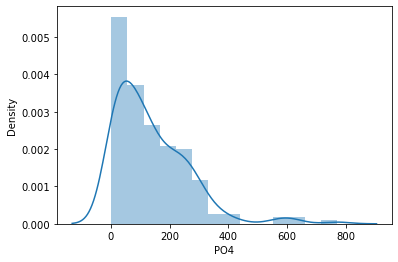

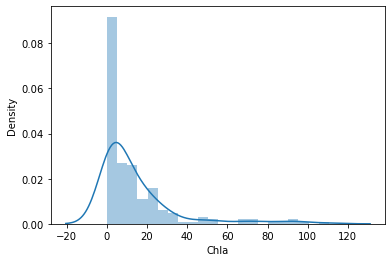

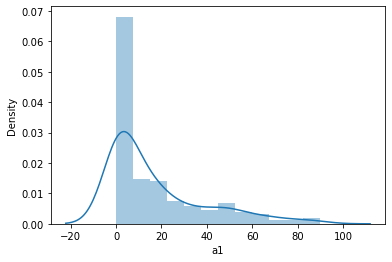

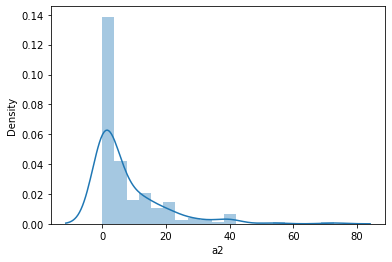

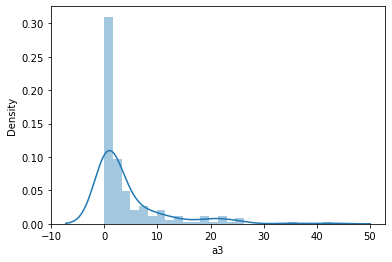

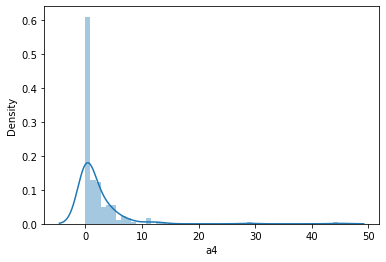

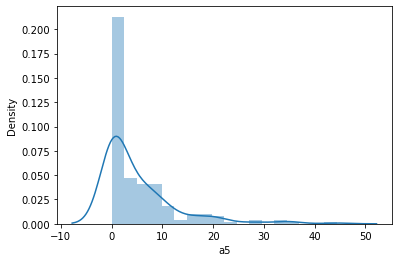

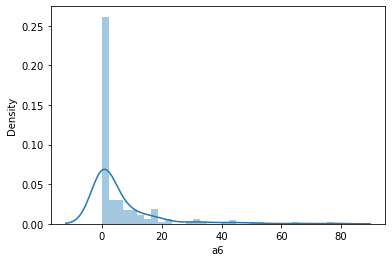

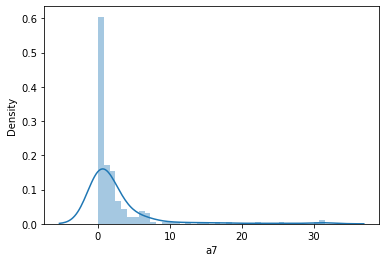

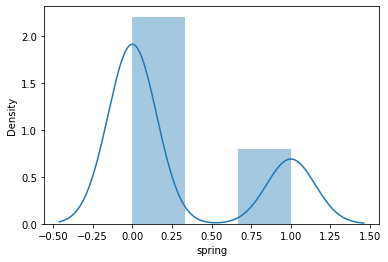

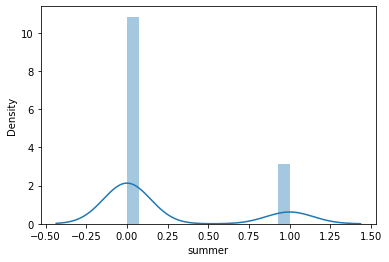

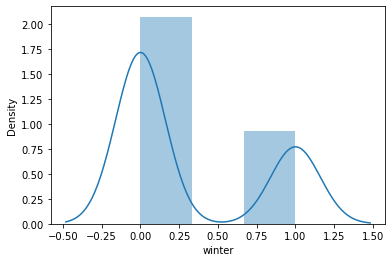

In [22]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

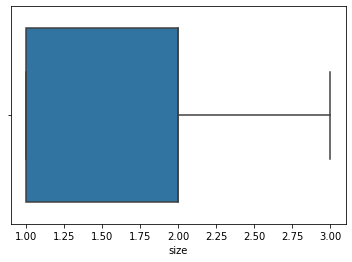

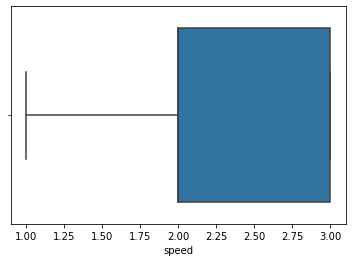

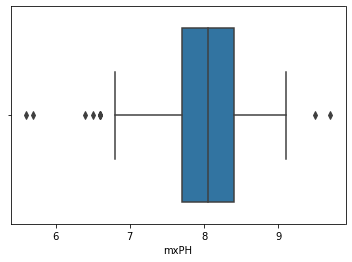

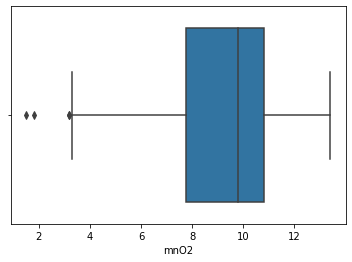

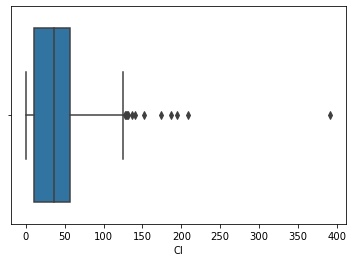

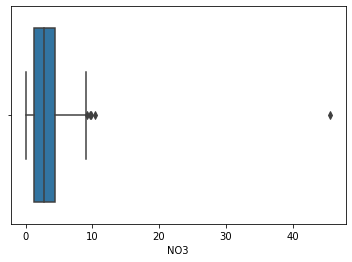

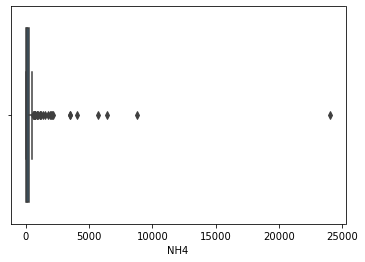

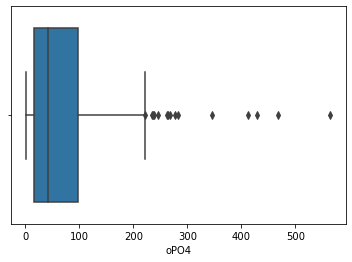

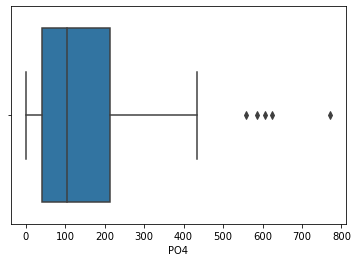

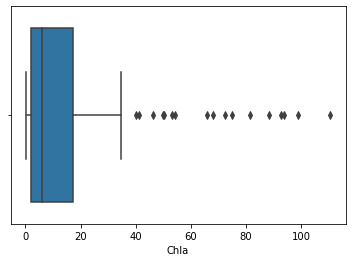

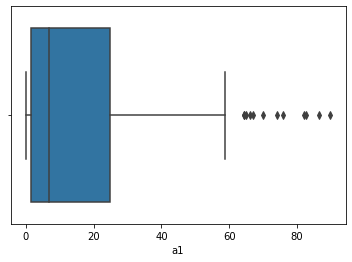

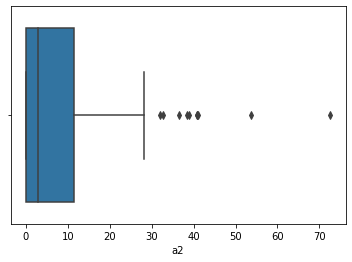

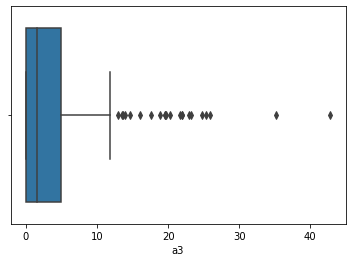

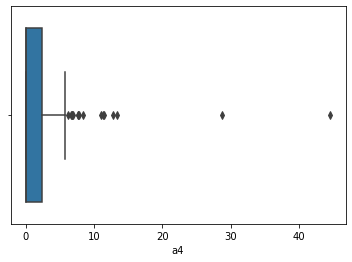

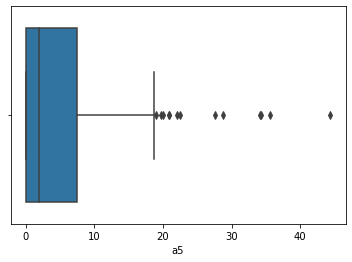

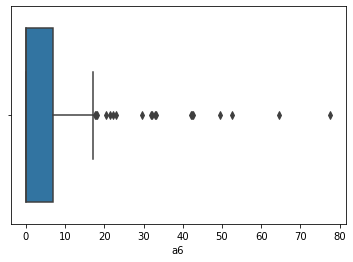

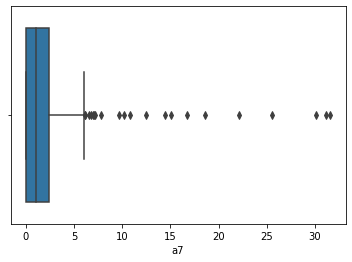

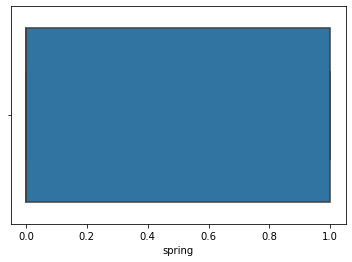

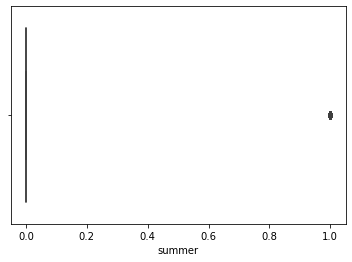

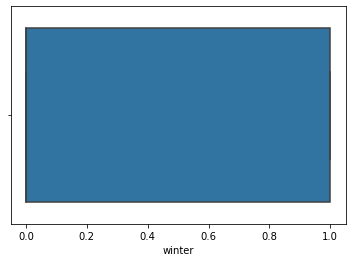

In [23]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

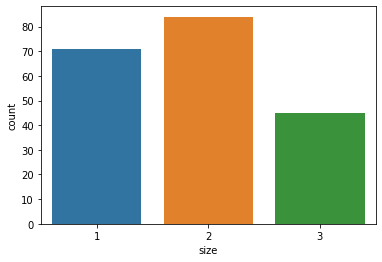

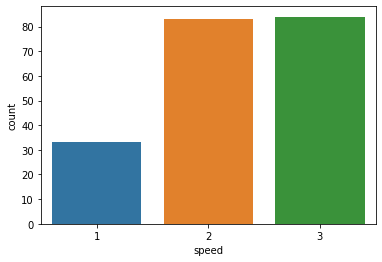

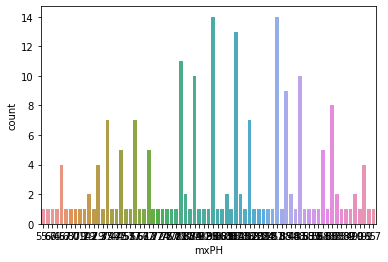

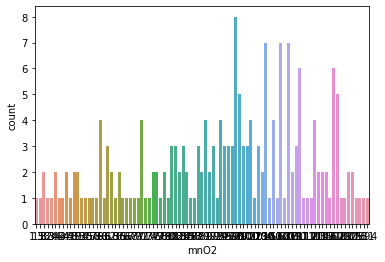

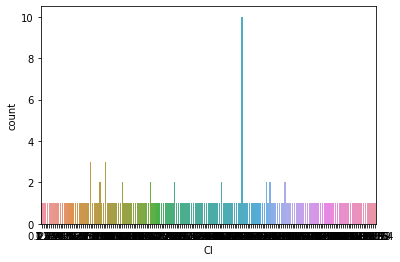

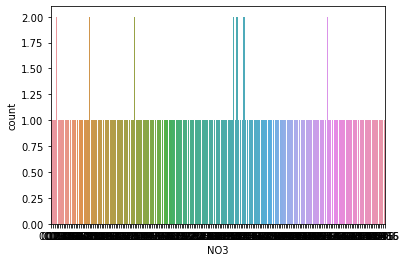

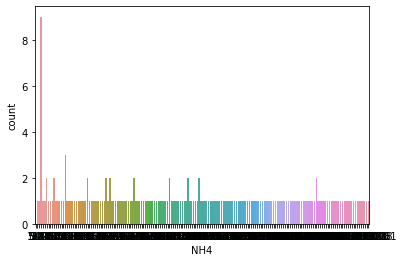

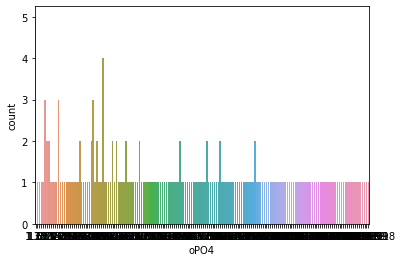

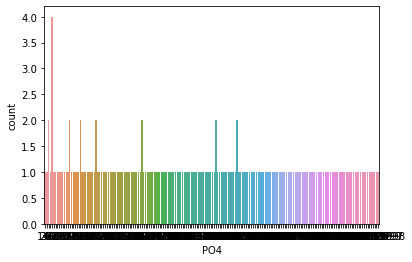

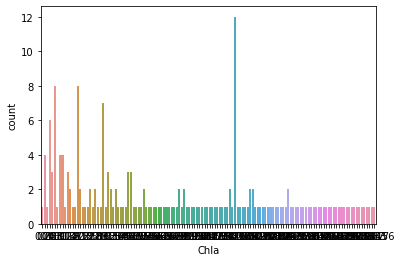

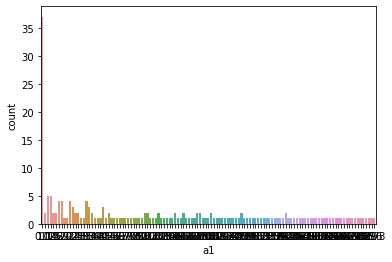

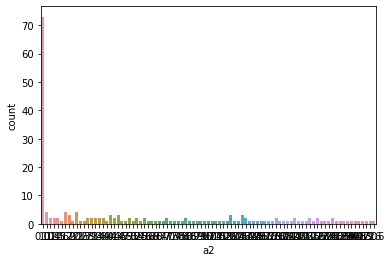

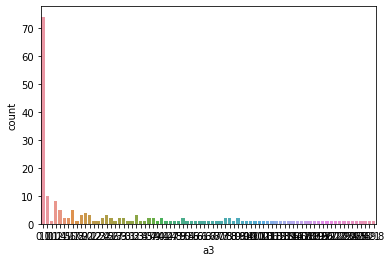

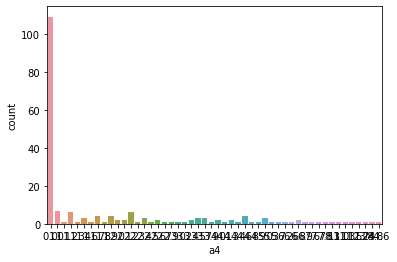

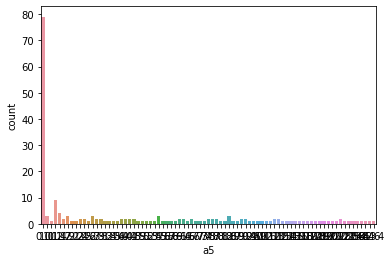

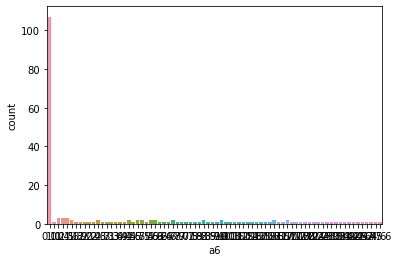

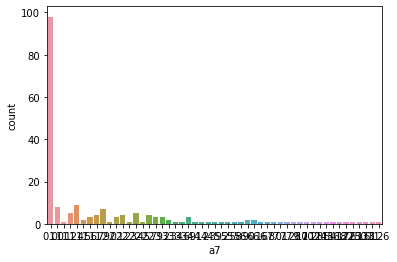

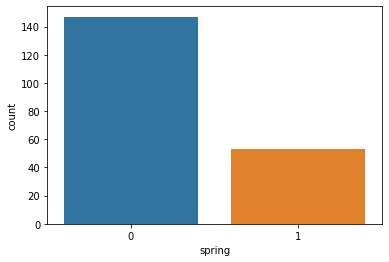

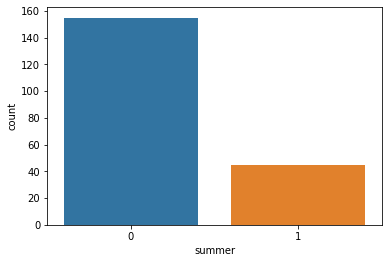

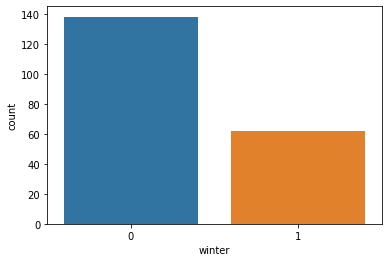

In [24]:
for i in df.columns:
    sns.countplot(df[i])
    plt.show()

## Train test split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df.columns

Index(['size', 'speed', 'mxPH', 'mnO2', 'Cl', 'NO3', 'NH4', 'oPO4', 'PO4',
       'Chla', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'spring', 'summer',
       'winter'],
      dtype='object')

In [27]:
X=df[['size', 'speed', 'mxPH', 'mnO2', 'Cl', 'NO3', 'NH4', 'oPO4', 'PO4','Chla','spring', 'summer','winter']]
y=df[['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7']]

In [28]:
X.head()

,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,spring,summer,winter
1,1,2,8.00,9.8,60.800,6.238,578.00000,105.000,170.00000,50.0,0,0,1
2,1,2,8.35,8.0,57.750,1.288,370.00000,428.750,558.75000,1.3,1,0,0
3,1,2,8.10,11.4,40.020,5.330,346.66699,125.667,187.05701,15.6,0,0,0
4,1,2,8.07,4.8,77.364,2.302,98.18200,61.182,138.70000,1.4,1,0,0
5,1,2,8.06,9.0,55.350,10.416,233.70000,58.222,97.58000,10.5,0,0,0


In [29]:
y.head()

,a1,a2,a3,a4,a5,a6,a7
1,0.0,0.0,0.0,0.0,34.2,8.3,0.0
2,1.4,7.6,4.8,1.9,6.7,0.0,2.1
3,3.3,53.6,1.9,0.0,0.0,0.0,9.7
4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
5,9.2,2.9,7.5,0.0,7.5,4.1,1.0


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalization 

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [32]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Linear_regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score

In [34]:
M1=LinearRegression()
M1.fit(X_train,y_train)
P1=M1.predict(X_test)
print('Mean_Absolute _error: ',mean_absolute_error(y_test,P1))
print('\n')
print('Mean_Squared_error: ',mean_squared_error(y_test,P1))
print('\n')
print('Squarroot_Mean_Squared_error: ',np.sqrt(mean_squared_error(y_test,P1)))
print('\n')
print('R2: ',r2_score(y_test,P1))

Mean_Absolute _error:  7.0686833158866715


Mean_Squared_error:  158.6424255495866


Squarroot_Mean_Squared_error:  12.59533348306374


R2:  -1.056473213556585


In [35]:
X_test[0]

array([0.5       , 0.        , 0.67741935, 0.71568627, 0.14312004,
       0.02701138, 0.02368569, 0.03903478, 0.17629457, 0.18710093,
       0.        , 0.        , 0.        ])

In [36]:
y_test.iloc[0]

a1     5.7
a2     0.0
a3     0.0
a4     4.4
a5    12.4
a6     8.3
a7     7.8
Name: 96, dtype: float64